# Task 1

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv') 
data.head(5) 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 1. Create a pie chart presenting the male/female proportion

In [8]:
s=round((data['sex'].value_counts())/len(data)*100,2) 
pd.DataFrame(s)

,sex
male,64.35
female,35.57


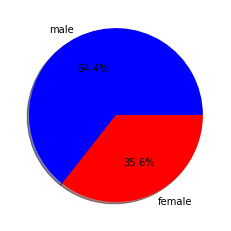

In [11]:
labels = ['male','female']
sizes = data.sex.value_counts() 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors = ['Blue','Red']) 
#ax1.axis('equal') 
plt.show()

# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<Figure size 432x288 with 0 Axes>

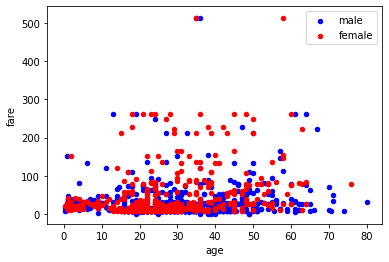

In [13]:
plt.figure()
category1 = data[data.sex == 'male'].plot.scatter('age', 'fare' , color='blue', label='male')
data[data.sex == 'female'].plot.scatter('age', 'fare' , color='red', label='female',ax= category1)

# Task 2

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [15]:
df.head(2)

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)


# 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column)

In [17]:
for index in range(0, df.FlightNumber.count()):
    if pd.isnull(df.loc[index, 'FlightNumber']):
        df.loc[index, 'FlightNumber'] = df.loc[index-1, 'FlightNumber'] + 10
        
df.astype({"FlightNumber":int})

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 2. The FromTo column would be better as two separate columns! Split each string on the underscore delimiter to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [18]:
df_temp = pd.DataFrame(df.From_To)
df_temp['From'] = df.From_To.str.split('_', expand = True)[0]
df_temp['To'] = df.From_To.str.split('_', expand = True)[1]
df_temp

,From_To,From,To
0,LoNDon_paris,LoNDon,paris
1,MAdrid_miLAN,MAdrid,miLAN
2,londON_StockhOlm,londON,StockhOlm
3,Budapest_PaRis,Budapest,PaRis
4,Brussels_londOn,Brussels,londOn


# 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [19]:
df_temp.From = df_temp.From.str.title()
df_temp.To = df_temp.To.str.title()
df_temp.From_To = df_temp.From_To.str.title()
df_temp

,From_To,From,To
0,London_Paris,London,Paris
1,Madrid_Milan,Madrid,Milan
2,London_Stockholm,London,Stockholm
3,Budapest_Paris,Budapest,Paris
4,Brussels_London,Brussels,London


# 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.